In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [17]:
# Load the dataset
file_path = r'C:\Users\DataMicron\Desktop\Work\Penjara\Dataset\Banduan_V7.xlsx'  
data = pd.read_excel(file_path)

# Dropping unnecessary columns
columns_to_drop = ['id_banduan', 'tarikh_masuk', 'status', 'tarikh_status','kategori_hukuman',
                   'penyakit', 'rawatan', 'umur', 'tempoh_hukuman','Highest_Edu_Level','program_pemulihan', 'bangsa']
data_cleaned = data.drop(columns_to_drop, axis=1)

# Converting the target variable to binary format
# Assuming 'Ya' for recidivism and 'Tidak' for non-recidivism
data_cleaned['banduan_berulang_kali'] = data_cleaned['banduan_berulang_kali'].map({'Ya': 1, 'Tidak': 0})

# Encoding categorical variables
data_encoded = pd.get_dummies(data_cleaned)

# Separating the features and the target variable
X = data_encoded.drop('banduan_berulang_kali', axis=1)
y = data_encoded['banduan_berulang_kali']

In [18]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Getting the feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

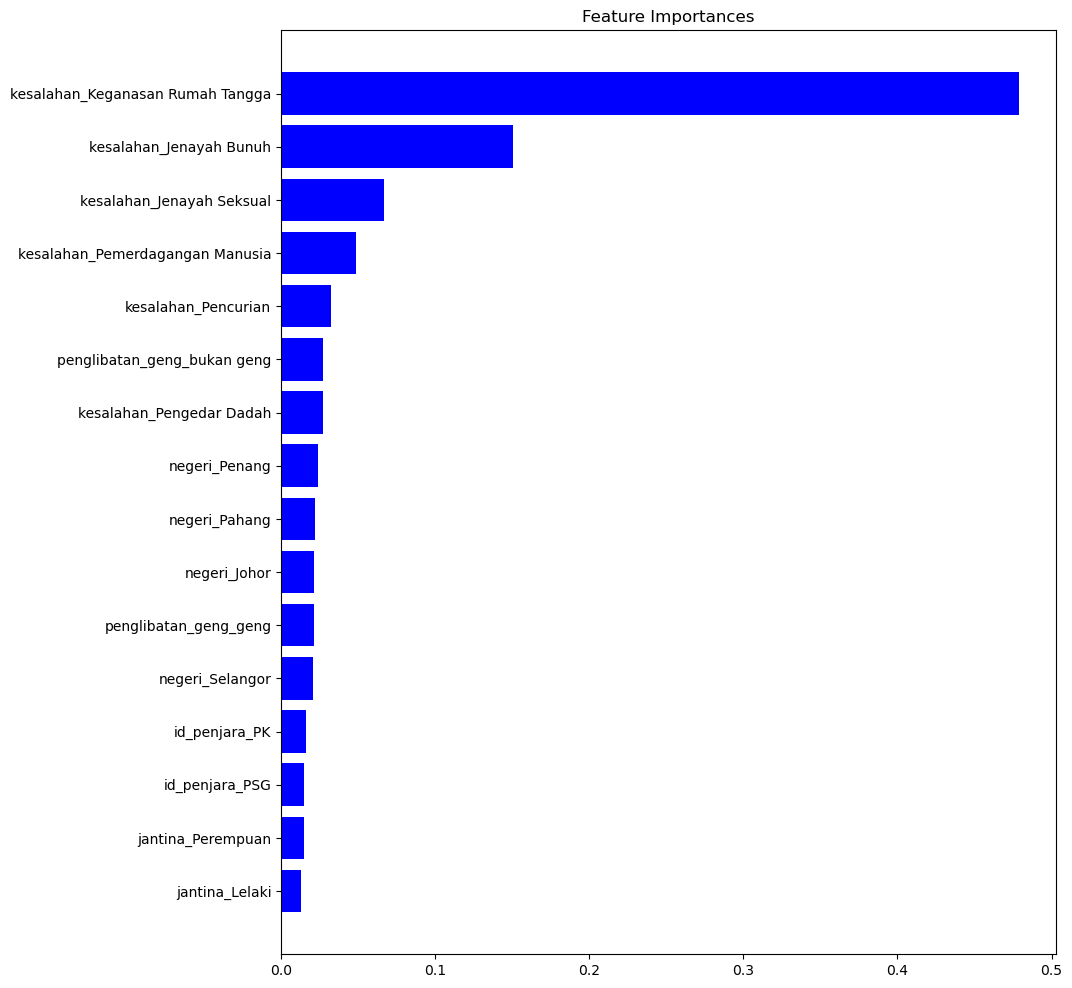

In [19]:
# Plotting the feature importances using a horizontal bar chart
plt.figure(figsize=(10, 12))
plt.title("Feature Importances")
plt.barh(range(X_train.shape[1]), importances[indices], color="b", align="center")
plt.yticks(range(X_train.shape[1]), X_train.columns[indices])
plt.gca().invert_yaxis() 
plt.show()